In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library("cowplot")

Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'cowplot' was built under R version 3.6.3"
********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [2]:
user <- read_csv('Users.csv')
glimpse(user)

Parsed with column specification:
cols(
  userID = col_double(),
  words = col_double(),
  moderation = col_double(),
  group = col_character(),
  like = col_double(),
  dislike = col_double(),
  Tutorial = col_double(),
  Offering = col_character(),
  time = col_double(),
  Decision = col_double(),
  Flagged = col_double(),
  Checkbox1 = col_double(),
  Checkbox2 = col_double(),
  Checkbox3 = col_double(),
  Checkbox4 = col_double(),
  Revised = col_double(),
  Confidence = col_double(),
  likeRate = col_double()
)


Rows: 374
Columns: 18
$ userID     <dbl> 22029, 22032, 22051, 22089, 22173, 22192, 22194, 22226, ...
$ words      <dbl> 25.750000, 12.500000, 15.000000, 5.312500, 1.000000, 7.7...
$ moderation <dbl> 4, 4, 4, 16, 4, 16, 4, 4, 4, 4, 4, 5, 5, 4, 6, 2, 7, 4, ...
$ group      <chr> "NP", "NP", "NP", "NP", "NP", "NP", "NP", "NP", "NP", "N...
$ like       <dbl> 0, 1, 0, 5, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,...
$ dislike    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ Tutorial   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ Offering   <chr> "INFS1200/7900", "INFS1200/7900", "INFS1200/7900", "INFS...
$ time       <dbl> 117397.00, 206986.25, 203557.50, 35432.50, 35418.75, 167...
$ Decision   <dbl> 4.250000, 3.500000, 3.750000, 4.312500, 4.000000, 3.8750...
$ Flagged    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ Checkbox1  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ...
$ Checkbox2  <dbl> NA, NA, NA,

In [4]:
table(user$ group)


 CP  NP 
187 187 

In [31]:
library(rlang)
myplot <- function(mydf, myxcol, myycol, ymin=0,ymax=1) {
   ggplot2::ggplot(data = mydf, aes(x=reorder({{ myxcol }}, 
      {{ myycol }}), y= {{ myycol }},col  = factor(group))) +
        geom_jitter(height = 0.1, width = 0.5,alpha = .08, shape = 16,aes(colour = factor(group)))+
        geom_violin(trim=TRUE,alpha=0.35, position = position_dodge(width = 1),colour=NA,aes( fill  = factor(group)))+
    geom_boxplot(notch = FALSE,width=.4,  outlier.size = -1, lwd=.6,outlier.shape = NA,fill = NA,
                 col=c('steelblue4','deeppink4'),lty=1)+ #,'',''
    ylim(ymin,ymax)+
    scale_x_discrete(limits=c('NP',"CP"),label=c('Control', 'Experiment' ))+ coord_flip()+ 
         stat_summary(fun.y=mean, geom="point", shape=18, size=4)+# color=c('orange4','darkolivegreen4','purple4','forestgreen'), fill=c('orange4','darkolivegreen4','purple4','forestgreen')) +
#     scale_colour_manual(limits=c('TR','AI',"NR", "SR",'SAI'),values = aes(colour = factor(Condition)))#c('darkkhaki','deeppink4','snow4','blue4','orchid4')) +
#     scale_fill_manual(limits=c('TR','AI',"NR", "SR",'SAI'),values = c('olivedrab4','maroon4','navajowhite4','steelblue4','violetred4')) +
#     scale_linetype_manual(limits=c('AI',"NR", "SR",'SAI'),values = c(1,1,1,1)) +
    theme(plot.title = element_text(hjust = 0.5),plot.margin = unit(c(0.1, 0.1, 0, 0), "cm"),axis.title.x=element_blank(), axis.title.y=element_blank(), 
    panel.grid=element_line(colour="lightgrey", size = (.05))  ,panel.background =element_blank() ,legend.position="none")

}

Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

png 
  2

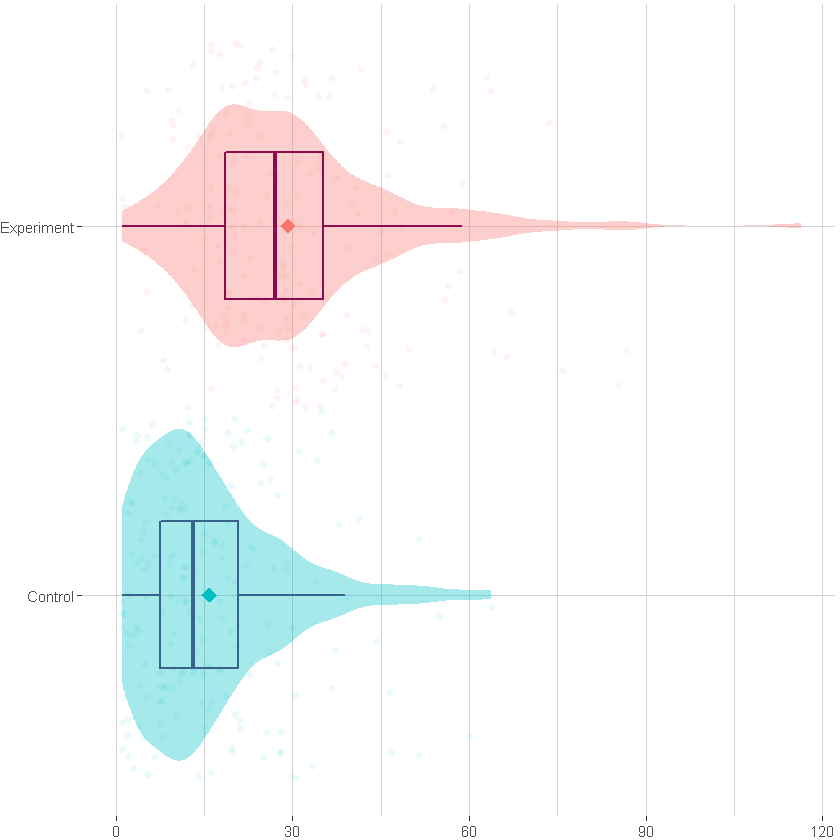

In [32]:
bx1=myplot(user, group, words,0,max(user$words))
bx1

pdf("words.pdf", width=4, height=3)
bx1
dev.off()


Warning message:
"Removed 53 rows containing missing values (geom_point)."Warning message:
"Removed 53 rows containing missing values (geom_point)."

png 
  2

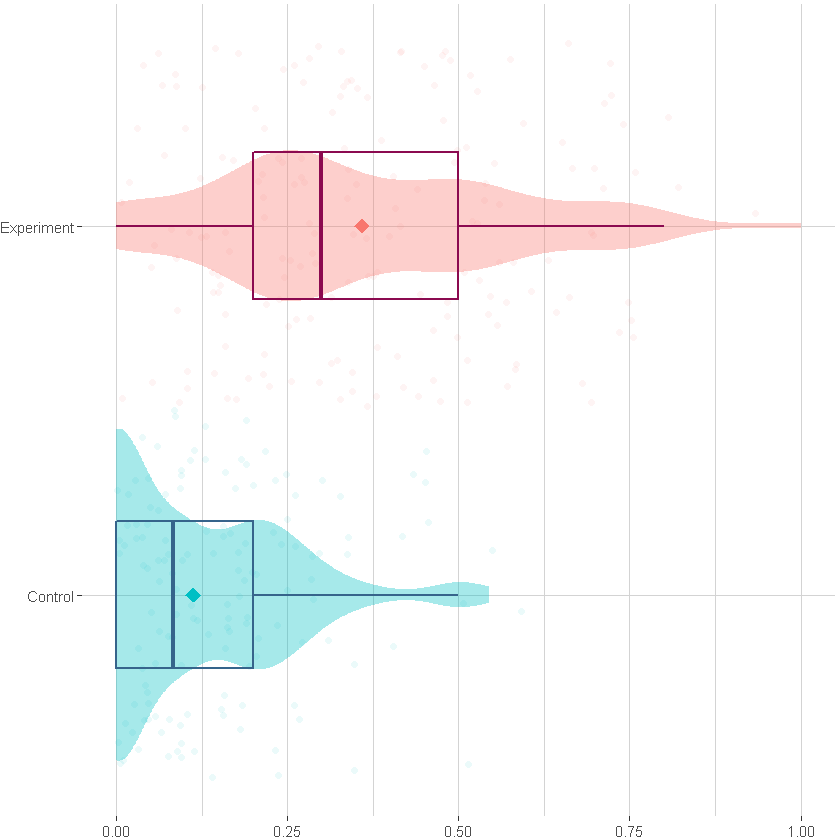

In [33]:
bx1=myplot(user, group, likeRate   ,0,max(user$likeRate   ))
bx1

pdf("likeRate.pdf", width=4, height=3)
bx1
dev.off()


Warning message:
"Removed 6 rows containing missing values (geom_point)."Warning message:
"Removed 6 rows containing missing values (geom_point)."

png 
  2

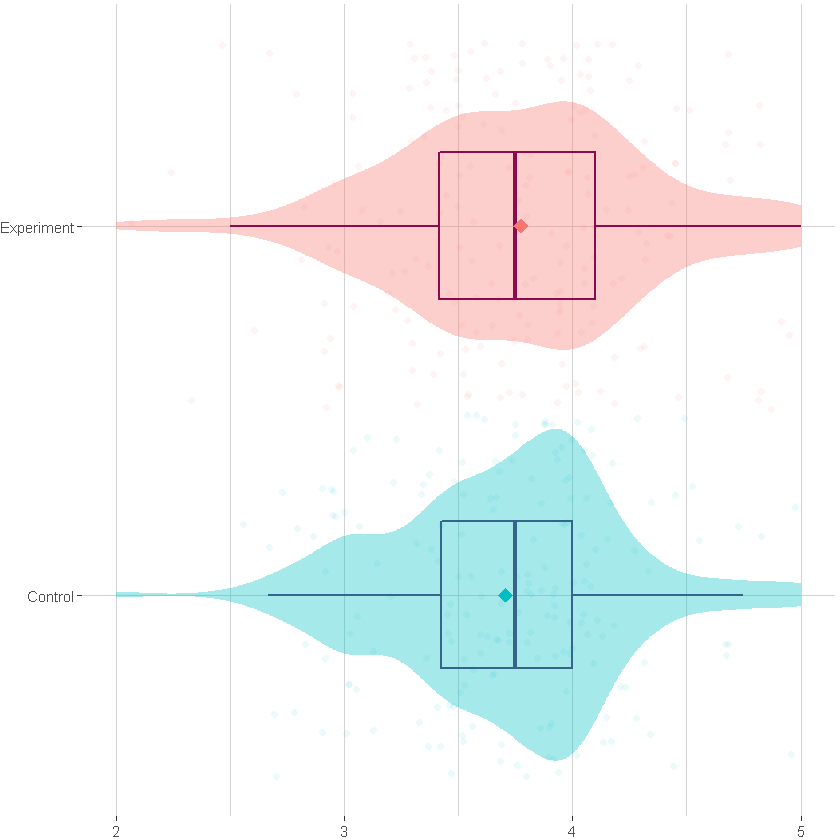

In [35]:
bx1=myplot(user, group, Decision      ,min(user$Decision      ),max(user$Decision      ))
bx1

pdf("Decision.pdf", width=4, height=3)
bx1
dev.off()


Warning message:
"Removed 9 rows containing missing values (geom_point)."Warning message:
"Removed 9 rows containing missing values (geom_point)."

png 
  2

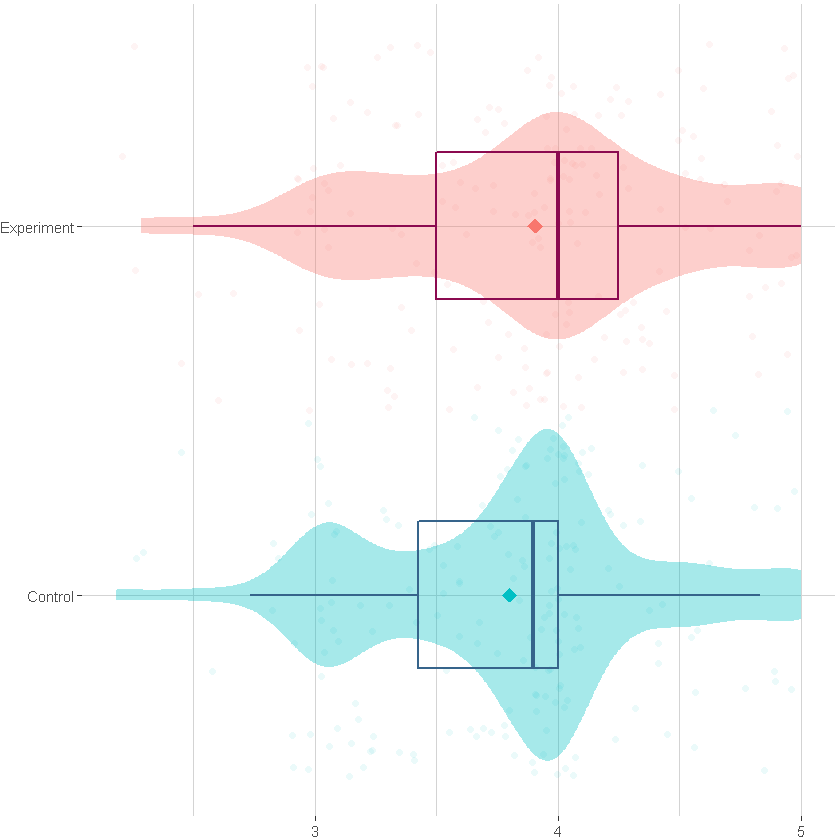

In [36]:
bx1=myplot(user, group, Confidence       ,min(user$Confidence       ),max(user$Confidence       ))
bx1

pdf("Confidence.pdf", width=4, height=3)
bx1
dev.off()
